# **INSTALL QISKIT**

In [1]:
!pip install qiskit --quiet
!pip install qiskit_machine_learning --quiet
!pip install qiskit[visualization] --quiet
!pip install qiskit-aer --quiet
#!pip install qiskit-ibm-runtime --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 85.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 69.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.6/231.6 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 96.7 MB/s eta 0:00:00


# **IMPORT LIBS**

In [2]:
import time
import qiskit
import math
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn import datasets
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from IPython.display import clear_output


from qiskit import ClassicalRegister                                                  # create classical registers
from qiskit import QuantumRegister                                                    # create quantum registers
from qiskit import QuantumCircuit                                                     # create quantum circuits
from qiskit_aer import Aer                                                            # import Aer


from qiskit.visualization import plot_histogram                                       # plot quantum circuits, measurements and results
from qiskit_machine_learning.utils import algorithm_globals
from qiskit_machine_learning.algorithms.classifiers import VQC                        # variational quantum classifier
from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier
from qiskit_machine_learning.neural_networks import SamplerQNN, EstimatorQNN
from qiskit_machine_learning.optimizers import COBYLA
from qiskit.primitives import StatevectorSampler as Sampler
from qiskit_machine_learning.circuit.library import QNNCircuit                        # quantum neural network
from qiskit.circuit.library import ZZFeatureMap, RealAmplitudes                       # create feature maps

# **QUANTUM HELLO WORLD**

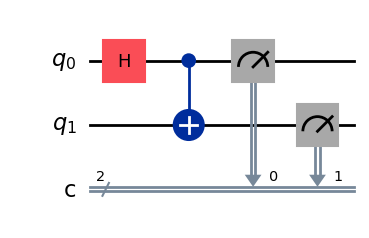

In [3]:
qc = QuantumCircuit(2,2)
qc.h(0)
qc.cx(0,1)
qc.measure([0,1],[0,1])
qc.draw(output = 'mpl')

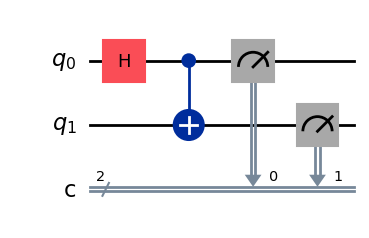

In [4]:
qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(2, 'c')
qc2 = QuantumCircuit(qreg_q, creg_c)

qc2.h(qreg_q[0])
qc2.cx(qreg_q[0], qreg_q[1])
qc2.measure(qreg_q[0], creg_c[0])
qc2.measure(qreg_q[1], creg_c[1])
qc2.draw(output='mpl')

## **HISTOGRAM**

In [5]:
simulator = Aer.get_backend('qasm_simulator')

In [6]:
qc_compiled = qiskit.transpile(qc, simulator)

In [7]:
job = simulator.run(qc_compiled)

In [8]:
result = job.result()

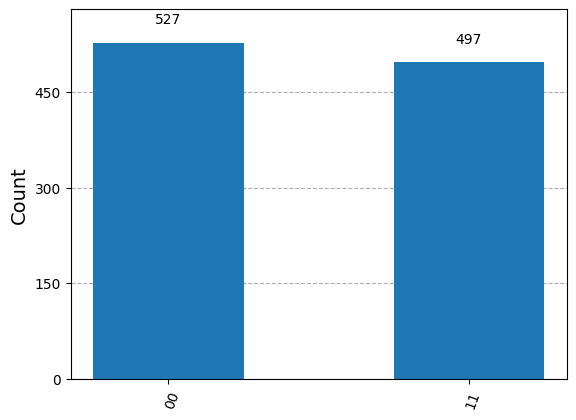

In [9]:
plot_histogram(result.get_counts(qc))

In [10]:
counts = result.get_counts(qc)

In [11]:
total_counts = sum(counts.values())

In [12]:
for outcome, count in counts.items():
  probability = (count / total_counts) * 100
  print(f"Outcome: {outcome}, Probability: {probability:.2f}%")

Outcome: 11, Probability: 48.54%
Outcome: 00, Probability: 51.46%


# **LOADING DATASETS**

# **IrisDataDF**

In [13]:
iris_data_df = datasets.load_iris()

In [14]:
print(iris_data_df.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [15]:
iris_data_df.data.shape

(150, 4)

In [16]:
iris_data_df.target[[5, 57, 123]]

array([0, 1, 2])

In [17]:
list(iris_data_df.target_names)

['setosa', 'versicolor', 'virginica']

In [18]:
features = iris_data_df.data
features

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [19]:
labels = iris_data_df.target
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [20]:
features = MinMaxScaler().fit_transform(features)

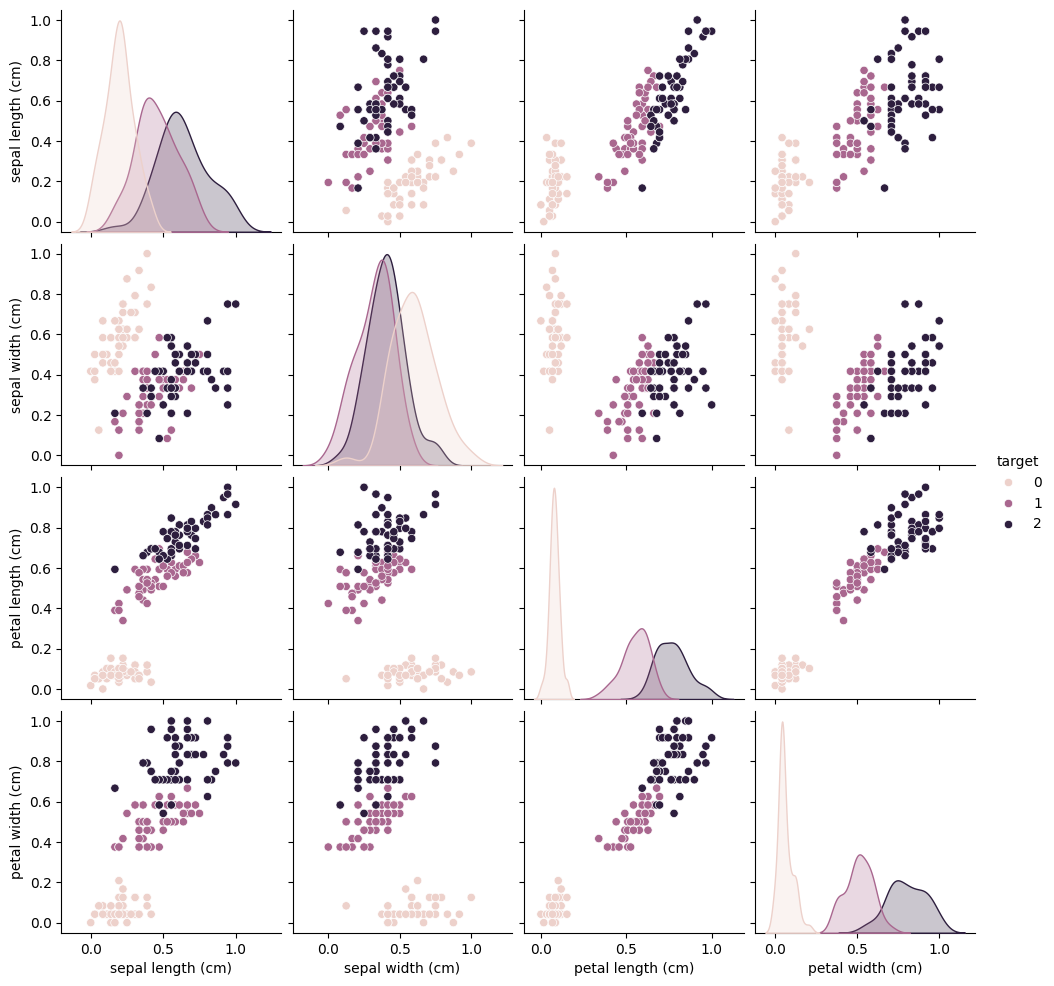

In [21]:
df = pd.DataFrame(features, columns=iris_data_df.feature_names)
df['target'] = labels
sns.pairplot(df, hue='target', vars=iris_data_df.feature_names[:5])
plt.show()

In [22]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    features, labels, test_size=0.3, random_state=100)

In [50]:
algorithm_globals.random_seed = 42
X_train, X_test, y_train, y_test = train_test_split(
    features, labels, train_size=0.8, random_state=algorithm_globals.random_seed
)

# **Decision Trees**

In [24]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [25]:
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Decision Tree Classifier: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy of the Decision Tree Classifier: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [26]:
cm = confusion_matrix(y_test, y_pred)

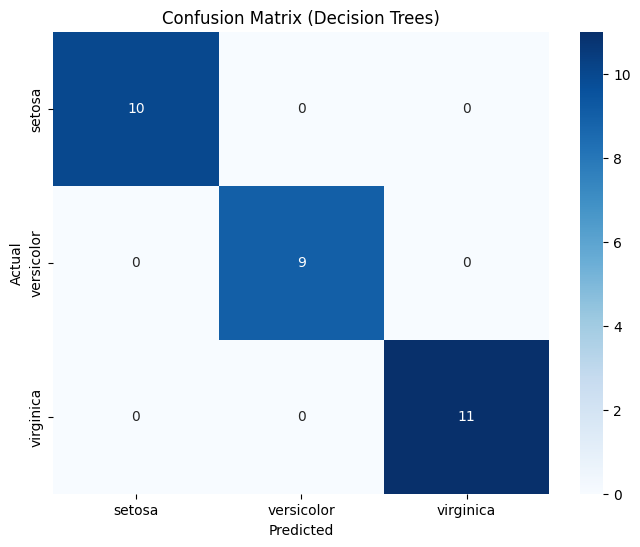

In [27]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels = iris_data_df.target_names,
            yticklabels = iris_data_df.target_names)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Decision Trees)")
plt.show()

# **Neural Networks**

In [28]:
mlp = MLPClassifier(hidden_layer_sizes=(100, 50),
                    max_iter=1500,
                    verbose=True,
                    random_state=100)
mlp.fit(X_train, y_train)

Iteration 1, loss = 1.15497326
Iteration 2, loss = 1.13907515
Iteration 3, loss = 1.12397780
Iteration 4, loss = 1.10961559
Iteration 5, loss = 1.09598535
Iteration 6, loss = 1.08316084
Iteration 7, loss = 1.07090788
Iteration 8, loss = 1.05915189
Iteration 9, loss = 1.04787817
Iteration 10, loss = 1.03704308
Iteration 11, loss = 1.02671933
Iteration 12, loss = 1.01676739
Iteration 13, loss = 1.00719038
Iteration 14, loss = 0.99794795
Iteration 15, loss = 0.98887050
Iteration 16, loss = 0.97986498
Iteration 17, loss = 0.97088232
Iteration 18, loss = 0.96189563
Iteration 19, loss = 0.95293668
Iteration 20, loss = 0.94400488
Iteration 21, loss = 0.93523319
Iteration 22, loss = 0.92665033
Iteration 23, loss = 0.91793307
Iteration 24, loss = 0.90908736
Iteration 25, loss = 0.90013985
Iteration 26, loss = 0.89107646
Iteration 27, loss = 0.88190752
Iteration 28, loss = 0.87265438
Iteration 29, loss = 0.86331320
Iteration 30, loss = 0.85391121
Iteration 31, loss = 0.84447249
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1500, random_state=100,
              verbose=True)

In [29]:
y_pred_mlp = mlp.predict(X_test)

accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print(f"Accuracy of the MLP Classifier: {accuracy_mlp}")
print(classification_report(y_test, y_pred_mlp))

Accuracy of the MLP Classifier: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [30]:
cm_mlp = confusion_matrix(y_test, y_pred_mlp)

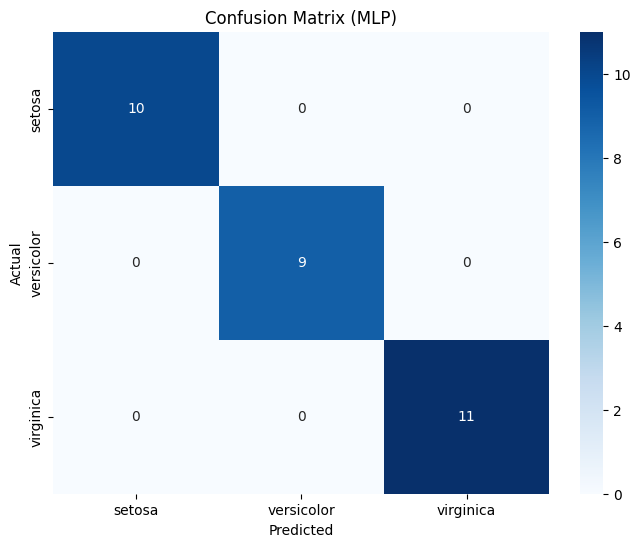

In [31]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_mlp, annot=True, fmt="d", cmap="Blues",
            xticklabels = iris_data_df.target_names,
            yticklabels = iris_data_df.target_names)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (MLP)")
plt.show()

# **SVMs**

In [32]:
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [33]:
y_pred_svc = svc.predict(X_test)

accuracy_svc = accuracy_score(y_test, y_pred_svc)
print(f"Accuracy of the MLP Classifier: {accuracy_svc}")
print(classification_report(y_test, y_pred_svc))

Accuracy of the MLP Classifier: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [34]:
cm_svc = confusion_matrix(y_test, y_pred_svc)

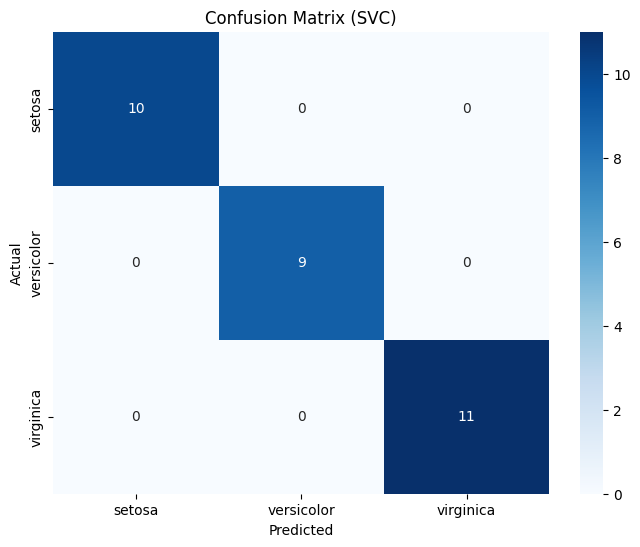

In [35]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_mlp, annot=True, fmt="d", cmap="Blues",
            xticklabels = iris_data_df.target_names,
            yticklabels = iris_data_df.target_names)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (SVC)")
plt.show()

# **Quantum Machine Learning**

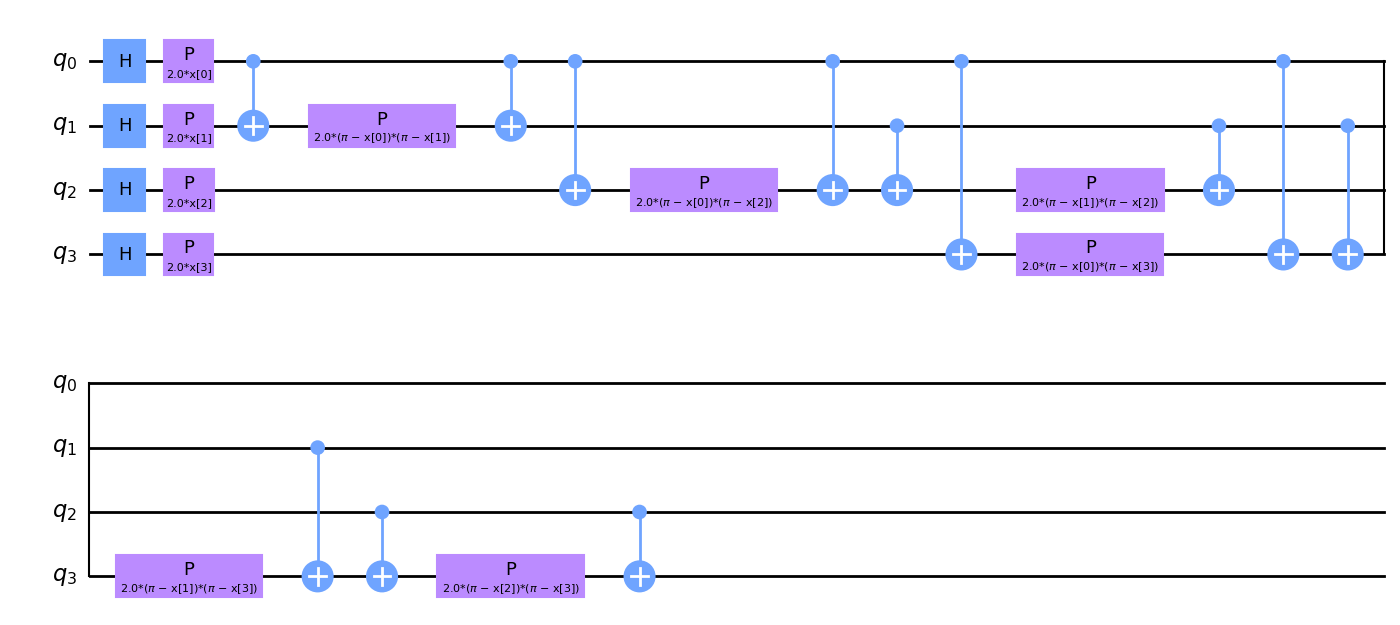

In [36]:
num_features = features.shape[1]

feature_map = ZZFeatureMap(feature_dimension=num_features, reps=1)
feature_map.decompose().draw(output="mpl", style="clifford", fold=20)

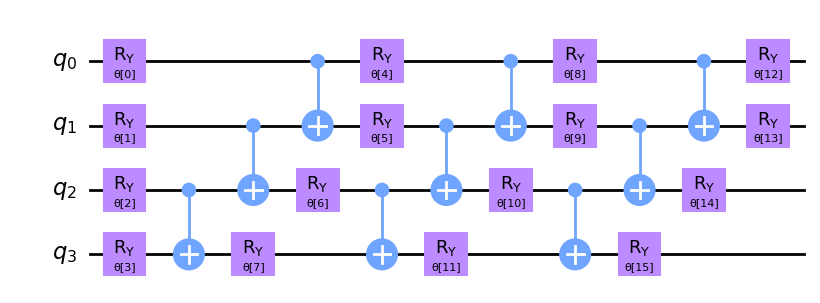

In [37]:
ansatz = RealAmplitudes(num_qubits=num_features, reps=3)
ansatz.decompose().draw(output="mpl", style="clifford", fold=20)

In [38]:
optimizer = COBYLA(maxiter=150)

In [39]:
sampler = Sampler()

In [40]:
objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)


def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

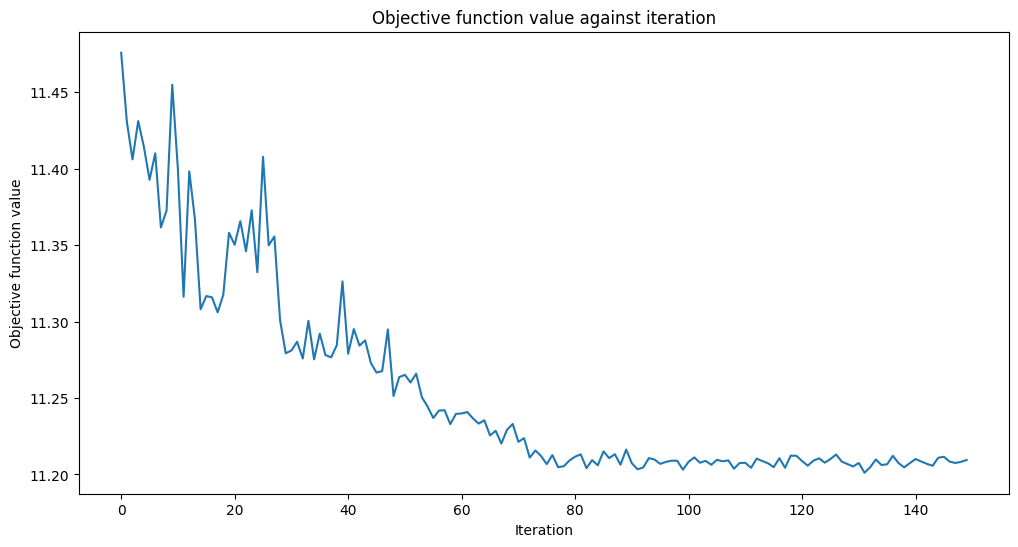

Training time: 237 seconds


In [51]:
vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

objective_func_vals = []

start = time.time()
vqc.fit(X_train, y_train)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

In [52]:
y_pred_vqc = vqc.predict(X_test)

accuracy_vqc = accuracy_score(y_test, y_pred_vqc)
print(f"Accuracy of the VQC Classifier: {accuracy_vqc}")
print(classification_report(y_test, y_pred_vqc))

Accuracy of the VQC Classifier: 0.6
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.45      1.00      0.62         9
           2       0.00      0.00      0.00        11

    accuracy                           0.60        30
   macro avg       0.45      0.63      0.51        30
weighted avg       0.43      0.60      0.49        30



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [53]:
cm_vqc = confusion_matrix(y_test, y_pred_vqc)

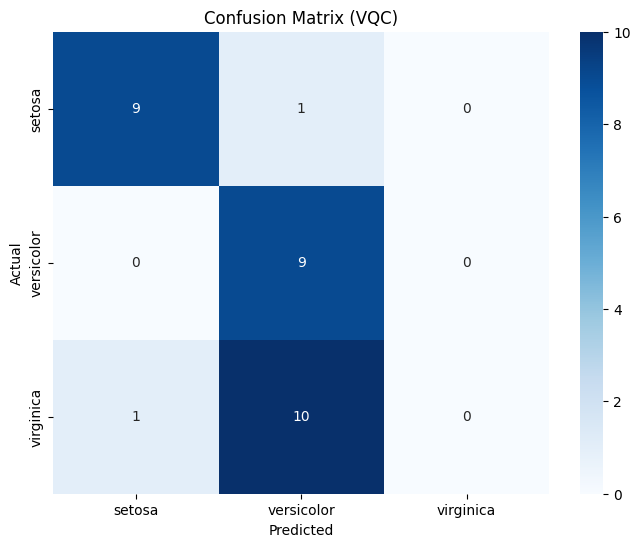

In [54]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_vqc, annot=True, fmt="d", cmap="Blues",
            xticklabels = iris_data_df.target_names,
            yticklabels = iris_data_df.target_names)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (VQC)")
plt.show()